In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical

from sklearn.metrics import confusion_matrix , classification_report
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import roc_curve, auc, roc_auc_score

from IPython.display import clear_output
import warnings
warnings.filterwarnings('ignore')

In [31]:
dataset = 'C:/Users/RAZAN/Downloads/FAC'

In [32]:
train_dir = "C:/Users/RAZAN/Downloads/FAC/train"
test_dir = "C:/Users/RAZAN/Downloads/FAC/test"

In [34]:
SEED = 12
IMG_HEIGHT = 48
IMG_WIDTH = 48
BATCH_SIZE = 64
EPOCHS = 30
FINE_TUNING_EPOCHS = 20
LR = 0.01
NUM_CLASSES = 7
EARLY_STOPPING_CRITERIA=3
CLASS_LABELS  = ['Anger', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sadness', "Surprise"]

In [35]:
preprocess_fun = tf.keras.applications.densenet.preprocess_input

train_datagen = ImageDataGenerator(horizontal_flip=True,
                                   width_shift_range=0.1,
                                   height_shift_range=0.05,
                                   rescale = 1./255,
                                   validation_split = 0.2,
                                   preprocessing_function=preprocess_fun
                                  )
test_datagen = ImageDataGenerator(rescale = 1./255,
                                  validation_split = 0.2,
                                  preprocessing_function=preprocess_fun)

train_generator = train_datagen.flow_from_directory(directory = train_dir,
                                                    target_size = (IMG_HEIGHT ,IMG_WIDTH),
                                                    batch_size = BATCH_SIZE,
                                                    shuffle  = True ,
                                                    color_mode = "rgb",
                                                    class_mode = "categorical",
                                                    subset = "training",
                                                    seed = 12
                                                   )
validation_generator = test_datagen.flow_from_directory(directory = train_dir,
                                                         target_size = (IMG_HEIGHT ,IMG_WIDTH),
                                                         batch_size = BATCH_SIZE,
                                                         shuffle  = True ,
                                                         color_mode = "rgb",
                                                         class_mode = "categorical",
                                                         subset = "validation",
                                                         seed = 12
                                                        )

test_generator = test_datagen.flow_from_directory(directory = test_dir,
                                                   target_size = (IMG_HEIGHT ,IMG_WIDTH),
                                                    batch_size = BATCH_SIZE,
                                                    shuffle  = False ,
                                                    color_mode = "rgb",
                                                    class_mode = "categorical",
                                                    seed = 12
                                                  )

Found 22968 images belonging to 7 classes.
Found 5741 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [36]:
test_generator.image_shape

(48, 48, 3)

In [45]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, BatchNormalization, Flatten, Dense, Dropout,Activation

# # Define the model architecture
# model = Sequential([
#     Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 3)),
#     MaxPool2D((2, 2)),
#     BatchNormalization(),
#     Dropout(0.3),  # Increased dropout rate
#     Conv2D(64, (3, 3), activation='relu'),
#     MaxPool2D((2, 2)),
#     Conv2D(128, (3, 3), activation='relu'),
#     MaxPool2D((2, 2)),
#     Conv2D(128, (3, 3), activation='relu'),
#     MaxPool2D((2, 2)),
#     Flatten(),
#     Dense(400, activation='relu'),
#     BatchNormalization(),
#     Dropout(0.5),  # Increased dropout rate
#     Dense(200, activation='relu'),
#     Dense(100, activation='relu'),
#     Dense(1, activation='sigmoid')
# ])

# # Compile the model
# model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# weight_decay = 1e-4

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 3)),
    MaxPool2D((2, 2)),
    BatchNormalization(),
    Dropout(0.3),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPool2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPool2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPool2D((2, 2)),
    Flatten(),
    Dense(400, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(200, activation='relu'),
    Dense(100, activation='relu'),
    Dense(7, activation='softmax')  # Changed to 7 neurons and softmax activation
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
 
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_23 (Conv2D)          (None, 46, 46, 32)        896       
                                                                 
 max_pooling2d_20 (MaxPooli  (None, 23, 23, 32)        0         
 ng2D)                                                           
                                                                 
 batch_normalization_10 (Ba  (None, 23, 23, 32)        128       
 tchNormalization)                                               
                                                                 
 dropout_10 (Dropout)        (None, 23, 23, 32)        0         
                                                                 
 conv2d_24 (Conv2D)          (None, 21, 21, 64)        18496     
                                                                 
 max_pooling2d_21 (MaxPooli  (None, 10, 10, 64)       

In [52]:
history = model.fit(train_generator, epochs=100, batch_size=32, validation_data=validation_generator)

Epoch 1/100
359/359 [==============================] - 83s 230ms/step - loss: 1.1333 - accuracy: 0.5700 - val_loss: 1.8909 - val_accuracy: 0.2966
Epoch 2/100
359/359 [==============================] - 82s 229ms/step - loss: 1.1258 - accuracy: 0.5698 - val_loss: 1.4396 - val_accuracy: 0.4470
Epoch 3/100
359/359 [==============================] - 80s 224ms/step - loss: 1.1204 - accuracy: 0.5750 - val_loss: 1.6139 - val_accuracy: 0.3771
Epoch 4/100
359/359 [==============================] - 81s 226ms/step - loss: 1.1199 - accuracy: 0.5770 - val_loss: 1.8200 - val_accuracy: 0.3740
Epoch 5/100
359/359 [==============================] - 80s 223ms/step - loss: 1.1054 - accuracy: 0.5802 - val_loss: 1.6504 - val_accuracy: 0.3485
Epoch 6/100
359/359 [==============================] - 81s 226ms/step - loss: 1.1099 - accuracy: 0.5786 - val_loss: 1.9065 - val_accuracy: 0.2869
Epoch 7/100
359/359 [==============================] - 80s 223ms/step - loss: 1.1118 - accuracy: 0.5799 - val_loss: 1.4354 -

In [54]:
loss, accuracy = model.evaluate(test_generator)
print(f'Accuracy: {accuracy*100}%')

113/113 [==============================] - 55s 487ms/step - loss: 1.3411 - accuracy: 0.5529
Accuracy: 55.29395341873169%


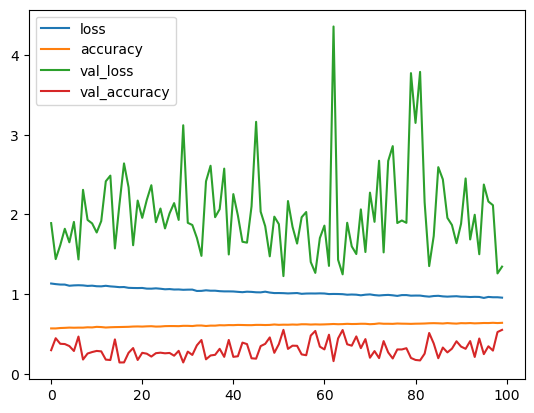

In [55]:
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_loss'],label='val_loss')
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.legend()

In [56]:
model.save('model_optimal.h5')

In [57]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model

# Load the trained model
model = load_model('model_optimal.h5')

# Access the laptop camera
camera = cv2.VideoCapture(0)  # 0 for default camera, change it accordingly

# Loop to continuously capture frames from the camera
while True:
    ret, frame = camera.read()
    
    # Preprocess the image
    resized_frame = cv2.resize(frame, (IMG_HEIGHT, IMG_WIDTH))
    preprocessed_frame = preprocess_fun(resized_frame)
    preprocessed_frame = np.expand_dims(preprocessed_frame, axis=0)  # Adding batch dimension
    
    # Make prediction using the model
    prediction = model.predict(preprocessed_frame)
    
    # Get the predicted emotion label
    predicted_label = CLASS_LABELS[np.argmax(prediction)]
    
    # Display the frame with predicted emotion
    cv2.putText(frame, predicted_label, (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
    cv2.imshow('Emotion Detection', frame)
    
    # Press 'q' to exit the loop
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the camera and close all windows
camera.release()
cv2.destroyAllWindows()


1/1 [==============================] - 0s 23ms/step
